# 📁 Etapa 1 - Carregamento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Configuração dos gráficos

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv('../dados/vgsales.csv')

# 📊 Etapa 2 - Exploração Inicial dos Dados

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# 🚀 Etapa 3 - Seleção, limpeza e transformação dos dados

In [8]:
# DF SEM PUBLISHERS NULOS
df_sem_publisher_nulo = df[df['Publisher'].notnull()]

In [9]:
df_sem_publisher_nulo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# 📊 Top 10 jogos mais vendidos da história

C:\Users\kabig\AppData\Local\Temp\ipykernel_22832\637081243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=top10_global, palette='rocket')


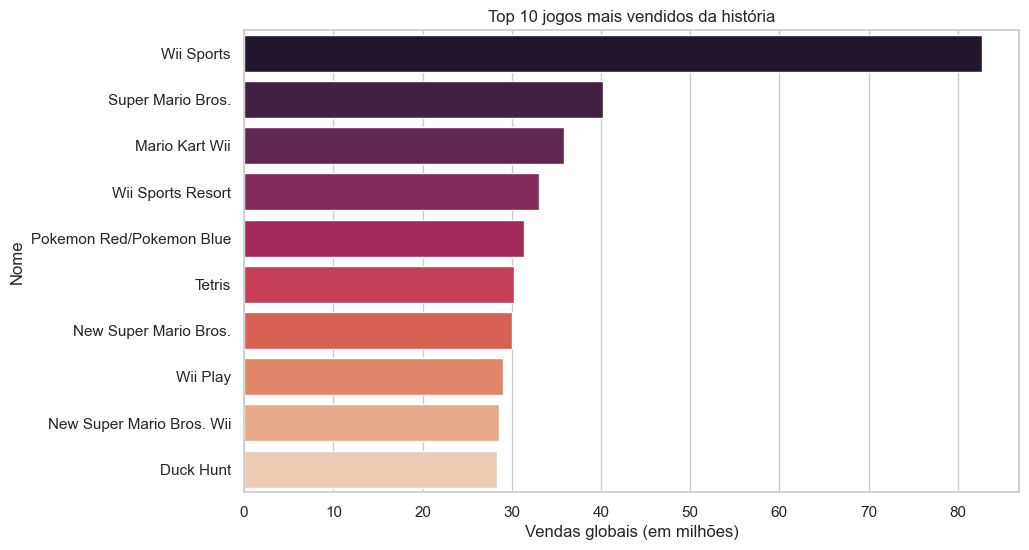

In [10]:
top10_global = df.sort_values(by='Global_Sales', ascending=False).head(10)

sns.barplot(x='Global_Sales', y='Name', data=top10_global, palette='rocket')
plt.title('Top 10 jogos mais vendidos da história')
plt.xlabel('Vendas globais (em milhões)')
plt.ylabel('Nome')
plt.show()

# 🏆 Top 10 editoras que mais venderam

C:\Users\kabig\AppData\Local\Temp\ipykernel_22832\2993172724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='mako')


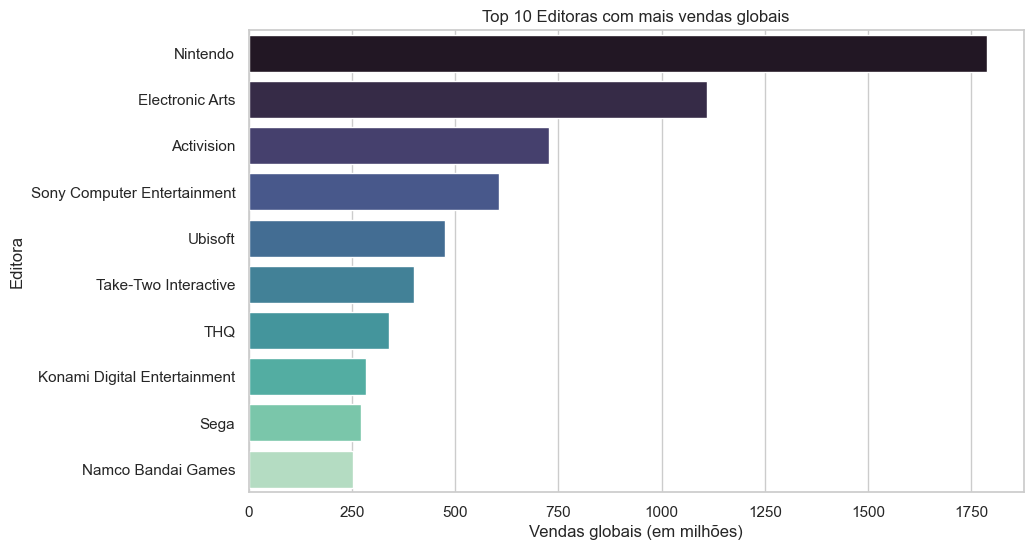

In [11]:
top_publishers = df_sem_publisher_nulo.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='mako')
plt.title('Top 10 Editoras com mais vendas globais')
plt.xlabel('Vendas globais (em milhões)')
plt.ylabel('Editora')
plt.show()

# 🎮 Gêneros mais populares por vendas globais

C:\Users\kabig\AppData\Local\Temp\ipykernel_22832\656802628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')


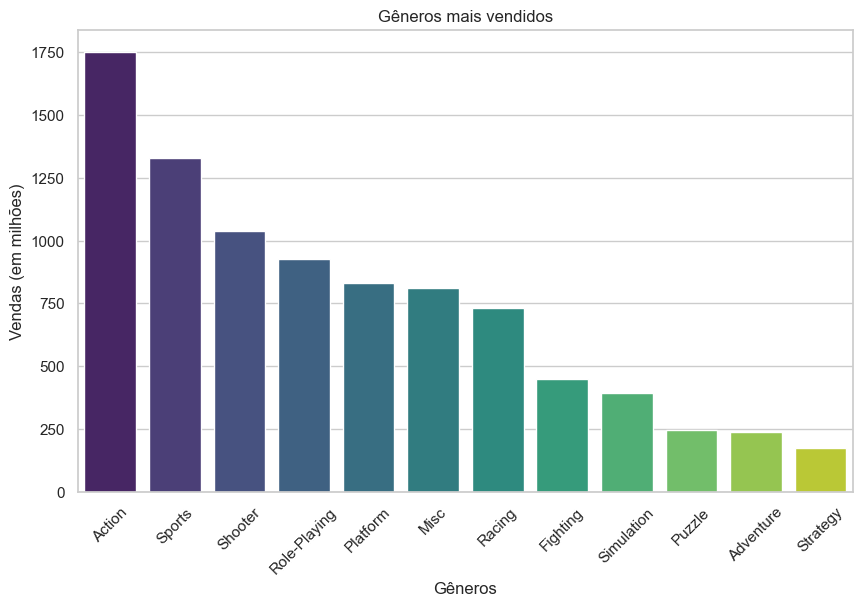

In [12]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title('Gêneros mais vendidos')
plt.ylabel('Vendas (em milhões)')
plt.xlabel('Gêneros')
plt.xticks(rotation=45)
plt.show()

# 🌍 Vendas por região (Continuente)



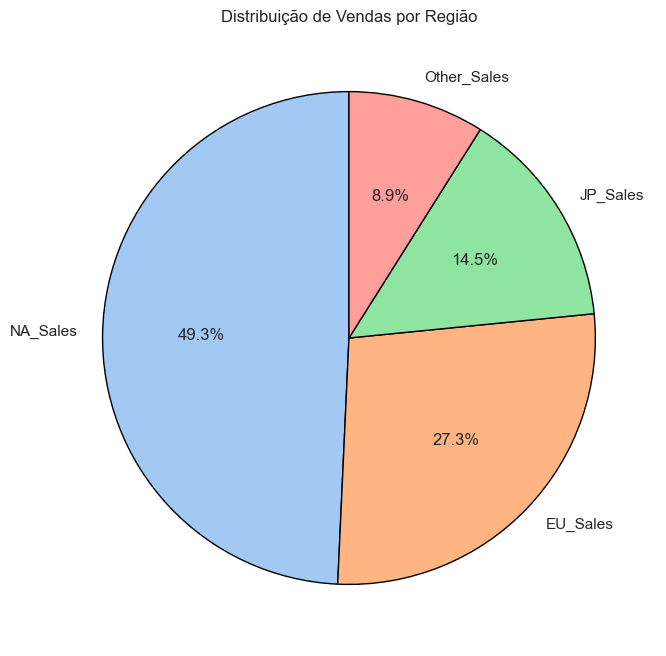

In [13]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales = df[regions].sum().sort_values(ascending=False)
colors = sns.color_palette('pastel', len(sales))

plt.figure(figsize=(8,8))
plt.pie(sales, labels=sales.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribuição de Vendas por Região')
plt.show()